In [2]:
import pandas as pd

/var/folders/9m/3n1wq0l97pgc3qn83dw9hqs80000gn/T/ipykernel_28053/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
file_path_h = "/Users/numan/Desktop/Milestone 1/milestone-one/src/data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility_20240114.csv"
file_path_c = "/Users/numan/Desktop/Milestone 1/milestone-one/src/data/Weekly_United_States_COVID-19_Cases_and_Deaths_by_County_-_ARCHIVED_20240113.csv"
hospital_df = pd.read_csv(file_path_h)
covid_df = pd.read_csv(file_path_c)

/var/folders/9m/3n1wq0l97pgc3qn83dw9hqs80000gn/T/ipykernel_28053/53802906.py:3: DtypeWarning: Columns (0,3,108) have mixed types. Specify dtype option on import or set low_memory=False.
  hospital_df = pd.read_csv(file_path_h)


In [4]:
for column in hospital_df.columns:
    if pd.api.types.is_numeric_dtype(hospital_df[column]):
        # Skip the conversion to 'Int64' if the column is already in a float dtype that can contain NaN
        if not pd.api.types.is_float_dtype(hospital_df[column]):
            try:
                hospital_df[column] = hospital_df[column].astype('Int64')
            except TypeError:
                print(f"Cannot convert column {column} due to incompatible data.")


In [5]:
columns_to_check = [ 
    'total_beds_7_day_avg',
    'total_beds_7_day_sum', 
    'inpatient_beds_used_covid_7_day_avg',
    'inpatient_beds_used_covid_7_day_sum',
    'total_icu_beds_7_day_avg', 
    'staffed_adult_icu_bed_occupancy_7_day_avg',  
]

# Clean specified columns in hospital_df to have no negative values
for column in columns_to_check:
    if column in hospital_df.columns:
        hospital_df[column] = hospital_df[column].clip(lower=0)


In [6]:
columns_of_interest = [
    'collection_week', 
    'total_beds_7_day_avg',
    'total_beds_7_day_sum', 
    'inpatient_beds_used_covid_7_day_avg',
    'inpatient_beds_used_covid_7_day_sum',
    'total_icu_beds_7_day_avg', 
    'staffed_adult_icu_bed_occupancy_7_day_avg', 
    'state', 
]

hospital_df = hospital_df[columns_of_interest]

In [7]:
# Aggregate collection_week in hosptial df

In [8]:
# Convert 'collection_week' and 'date' to datetime
hospital_df['collection_week'] = pd.to_datetime(hospital_df['collection_week'], errors='coerce')
covid_df['date'] = pd.to_datetime(covid_df['date'], errors='coerce')


In [9]:
# Extract the week and year from the date
hospital_df['year'] = hospital_df['collection_week'].dt.isocalendar().year
hospital_df['week'] = hospital_df['collection_week'].dt.isocalendar().week

covid_df['year'] = covid_df['date'].dt.isocalendar().year
covid_df['week'] = covid_df['date'].dt.isocalendar().week


In [10]:

covid_weekly = covid_df.groupby(['year', 'week']).agg({
    'New cases': 'sum',
    'New deaths': 'sum',
    'cumulative_cases': 'max',
    'cumulative_deaths': 'max'
}).reset_index()

In [11]:
merged_df = pd.merge(
    hospital_df, 
    covid_weekly, 
    on=['year', 'week'], 
    how='inner'
)

In [12]:
merged_df.head()

,collection_week,total_beds_7_day_avg,total_beds_7_day_sum,inpatient_beds_used_covid_7_day_avg,inpatient_beds_used_covid_7_day_sum,total_icu_beds_7_day_avg,staffed_adult_icu_bed_occupancy_7_day_avg,state,year,week,New cases,New deaths,cumulative_cases,cumulative_deaths
0,2020-04-26,NaN,NaN,NaN,NaN,7.0,NaN,AL,2020,17,199140,15567,46455,4022
1,2020-06-28,NaN,NaN,NaN,NaN,NaN,NaN,CA,2020,26,209606,3871,88458,7120
2,2020-04-26,NaN,NaN,5.5,22.0,8.0,NaN,CA,2020,17,199140,15567,46455,4022
3,2020-05-10,168.7,1181.0,19.9,139.0,40.0,NaN,CT,2020,19,187925,12879,56457,5060
4,2020-05-03,NaN,NaN,0.0,0.0,0.0,NaN,CT,2020,18,199919,13984,52302,4643


In [13]:
merged_df['total_beds_7_day_sum'].head()

0       NaN
1       NaN
2       NaN
3    1181.0
4       NaN
Name: total_beds_7_day_sum, dtype: float64

In [14]:
columns_to_round = [
    'inpatient_beds_used_covid_7_day_sum', 
    'total_icu_beds_7_day_avg', 
    'staffed_adult_icu_bed_occupancy_7_day_avg',
    'total_beds_7_day_sum'
]

merged_df[columns_to_round] = merged_df[columns_to_round].round(2)

In [15]:
#merged_df['zip'] = merged_df['zip'].astype(int)

In [16]:
merged_df.head()

,collection_week,total_beds_7_day_avg,total_beds_7_day_sum,inpatient_beds_used_covid_7_day_avg,inpatient_beds_used_covid_7_day_sum,total_icu_beds_7_day_avg,staffed_adult_icu_bed_occupancy_7_day_avg,state,year,week,New cases,New deaths,cumulative_cases,cumulative_deaths
0,2020-04-26,NaN,NaN,NaN,NaN,7.0,NaN,AL,2020,17,199140,15567,46455,4022
1,2020-06-28,NaN,NaN,NaN,NaN,NaN,NaN,CA,2020,26,209606,3871,88458,7120
2,2020-04-26,NaN,NaN,5.5,22.0,8.0,NaN,CA,2020,17,199140,15567,46455,4022
3,2020-05-10,168.7,1181.0,19.9,139.0,40.0,NaN,CT,2020,19,187925,12879,56457,5060
4,2020-05-03,NaN,NaN,0.0,0.0,0.0,NaN,CT,2020,18,199919,13984,52302,4643


In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


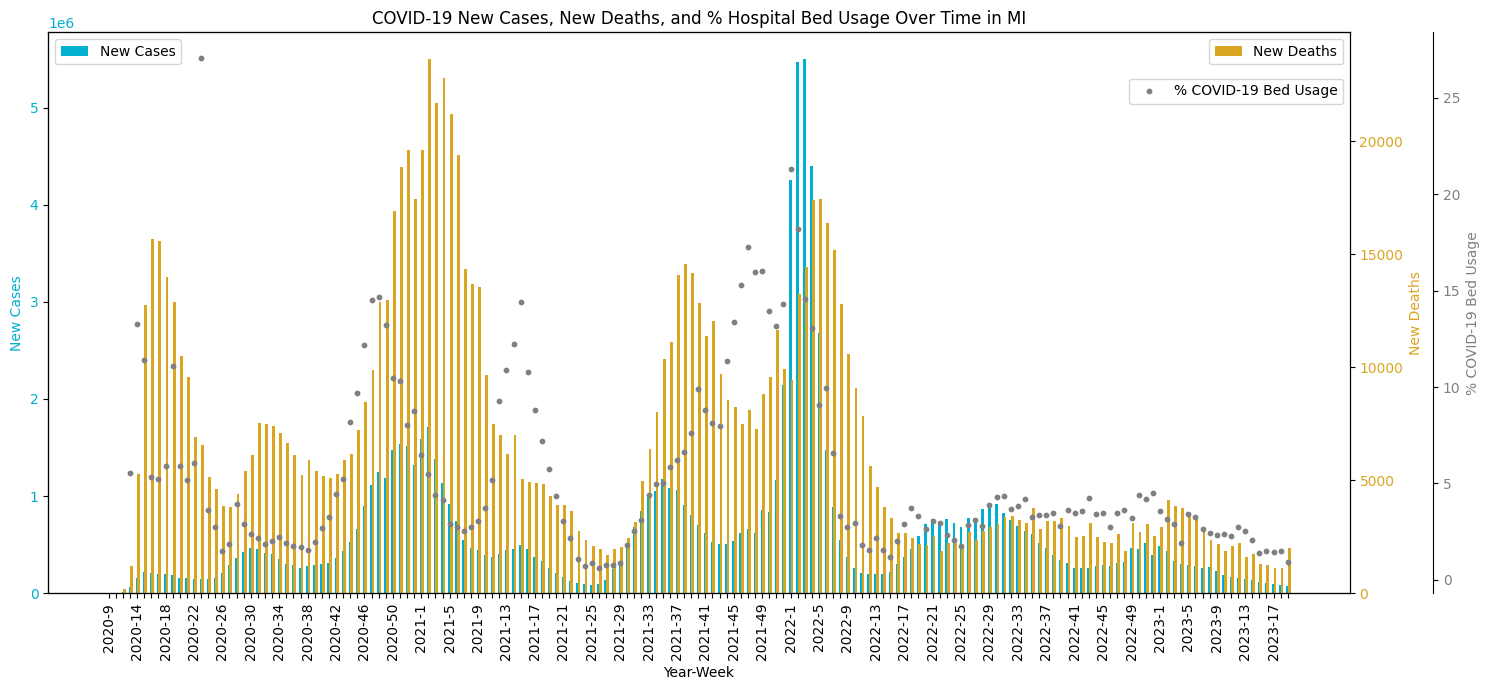

In [19]:
# Assuming you have already filtered and sorted mi_data by 'MI'
mi_data = merged_df[merged_df['state'] == 'MI'].sort_values(['year', 'week'])

# Generating a unique identifier for each week by combining year and week number
mi_data['year_week'] = mi_data['year'].astype(str) + '-' + mi_data['week'].astype(str)

# Calculate the percentage of inpatient beds used for COVID-19 out of total beds
mi_data['covid_bed_usage_pct'] = (mi_data['inpatient_beds_used_covid_7_day_sum'] / mi_data['total_beds_7_day_sum']) * 100

# Calculate the rolling average
mi_data['rolling_avg'] = mi_data['covid_bed_usage_pct'].rolling(window=4).mean()

# Group the data by 'year_week' and calculate the mean of the rolling average
average_bed_usage = mi_data.groupby('year_week')['rolling_avg'].mean().reset_index()

# Create a new figure and subplot
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot 'New cases' on the left y-axis
color = '#01afd1'
ax1.set_xlabel('Year-Week')
ax1.set_ylabel('New Cases', color=color)
ax1.bar(mi_data['year_week'], mi_data['New cases'], color=color, label='New Cases', width=0.4, align='center')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'New deaths'
ax2 = ax1.twinx()
color = '#DAA520'
ax2.set_ylabel('New Deaths', color=color)
ax2.bar(mi_data['year_week'], mi_data['New deaths'], color=color, label='New Deaths', width=0.4, align='edge')
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for hospital bed usage
ax3 = ax1.twinx()
# Offset the right spine of ax3. The ticks and label have already been
# placed on the right by twinx above.
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to the right
color = '#808080'
ax3.set_ylabel('% COVID-19 Bed Usage', color=color)
# Use 'average_bed_usage' for plotting the percentage of COVID-19 bed usage
ax3.scatter(average_bed_usage['year_week'], average_bed_usage['rolling_avg'], color=color, label='% COVID-19 Bed Usage', s=10)
ax3.tick_params(axis='y', labelcolor=color)

# Set the title of the plot
plt.title('COVID-19 New Cases, New Deaths, and % Hospital Bed Usage Over Time in MI')

# Rotate the date labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

# Adjust the ticks to show every Nth label to avoid clutter
for index, label in enumerate(ax1.xaxis.get_ticklabels()):
    if index % 4 != 0:
        label.set_visible(False)

# Show the legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right', bbox_to_anchor=(1, 0.93))

# Show the plot
plt.tight_layout()
plt.show()